In [2]:
import numpy
import urllib.request
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict

In [3]:
### PCA on beer reviews ###
def parseData(fname):
      for l in urllib.request.urlopen(fname):
            yield eval(l)

print ("Reading data...")
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print ("done")


Reading data...
done


In [4]:
def feature(datum):
    datum_text=datum['review/text'].lower().split()
    feat = [datum_text.count("lactic"),datum_text.count("tart"),datum_text.count("sour"),datum_text.count("citric"),datum_text.count("sweet"),datum_text.count("acid"),datum_text.count("hop"),datum_text.count("fruit"),datum_text.count("salt"),datum_text.count("spicy")]
    return feat


In [44]:
X = [feature(d) for d in data]
X_train = X[:int(len(X)/3)]


In [63]:
pca = PCA(n_components=2)
pca.fit(X_train)
#print (pca.components_)
#after using pca.fit_transform, we get loadings for each samples.
#meaning how much of each component you need to describe it best using a linear combination of the components_ (the principal axes in feature space).
X_train_pca=pca.fit_transform(X_train)
X_projected = pca.inverse_transform(X_train_pca)
loss = np.mean((X_train - X_projected)** 2)*10
loss


0.33108369081315764

In [54]:
judge=[1 if d['beer/style'] == 'American IPA' else 0 for d in data ]
judge_ipa=judge[:int(len(y)/3)]


In [55]:
import matplotlib.pyplot as plt
import numpy as np

data_IPA=[X_train_pca[i] for i in range(len(X_train)) if judge_ipa[i]==1]
data_else=[X_train_pca[i] for i in range(len(X_train)) if judge_ipa[i]==0]
for i in range(len(data_IPA)):
    data_IPA[i]=data_IPA[i].tolist()
data_IPA=np.array(data_IPA)
for i in range(len(data_else)):
    data_else[i]=data_else[i].tolist()
data_else=np.array(data_else)




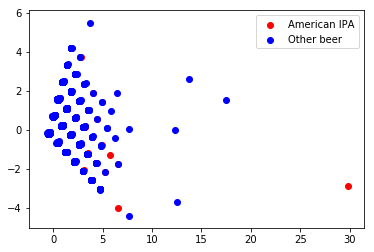

In [57]:
x_ipa=data_IPA[:,0]
y_ipa=data_IPA[:,1]
x_else=data_else[:,0]
y_else=data_else[:,1]
ipa=plt.scatter(x_ipa,y_ipa,color = 'red')
other=plt.scatter(x_else,y_else,color = 'blue')
plt.legend((ipa,other),('American IPA','Other beer'))
plt.show()
